# Êé¢Á¥¢ÊÑèÂõæ

## ‰ΩøÁî®ËÅöÁ±ªÊé¢Á¥¢ÊÑèÂõæ

Âú®ËøôÊú¨Á¨îËÆ∞Êú¨‰∏≠ÔºåÊàëÈááÁî®‰∫ÜÂâç‰∏ÄÊú¨Á¨îËÆ∞Êú¨‰∏≠ÁªèËøáÈ¢ÑÂ§ÑÁêÜÂíåÊ†áËÆ∞ÁöÑÊï∞ÊçÆÔºåÂπ∂ËØïÂõæÈÄöËøá‰ΩøÁî®ÊúâÊÑè‰πâÁöÑÊñáÊ°£ÂµåÂÖ•ÊñπÊ≥ïÔºàËøôÊ†∑ÊàëÁöÑÊ®°ÂûãÂ∞±ÂèØ‰ª•ËØªÂèñÊï∞ÊçÆÔºâÂíåÊó†ÁõëÁù£Â≠¶‰π†ÊñπÊ≥ïÔºàÂ¶ÇK-Means„ÄÅDBScanÂíåLDAÔºâ‰∏∫Êï∞ÊçÆÈõÜ‰∏≠ÁöÑÊØèÊù°Êé®ÊñáÂàÜÈÖçÊ†áÁ≠æ„ÄÇ

ÊàëÊääÊàëÁöÑÊÑèÂõæÂàÜ‰∏∫Âá†Á±ªÔºåÊÄªÂÖ±Êúâ11Á±ª„ÄÇÂØπ‰∫éÂú®Áúã‰∏çËßÅÁöÑÊï∞ÊçÆ‰∏äËøõË°åÊÑèÂõæÂàÜÁ±ªÁöÑÊàêÂäüNNËÆ≠ÁªÉÔºåÊàëËÆ§‰∏∫ÊØè‰∏™ÊÑèÂõæ1000‰∏™ÊòØÊúâÁî®ÁöÑ„ÄÇ

In [4]:
# We need more packages!
# Data science
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")

# Unsupervised Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import silhouette_score, silhouette_samples

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from sklearn.manifold import TSNE

# Word Embeddings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
import gensim
print(f'gensim: {gensim.__version__}')

# Doc2Vec
from nltk.tokenize import word_tokenize 
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

# Storing as objects via serialization
from tempfile import mkdtemp
import pickle
import joblib

# Directory
import os
import yaml

# Cool progress bars
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()  # Enable tracking of execution progress

# Reading in intents
with open(r'objects/intents.yml') as file:
    intents = yaml.load(file, Loader=yaml.FullLoader)
    
# Loading in the already saved processed dataset
processed_inbound = pd.read_pickle('objects/processed_inbound.pkl')

# Representing my tokenized data as String documents and storing it into a variable
string_processed_inbound = processed_inbound.progress_apply(" ".join)

# We start with this data, here's the preview
processed_inbound.head()

Pandas: 1.2.3
Numpy: 1.18.5
gensim: 3.8.3


/var/folders/8z/_m3tlbk55sv4j8cl6sp2_7gw0000gn/T/ipykernel_13285/3873072998.py:50: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()  # Enable tracking of execution progress


0it [00:00, ?it/s]

  0%|          | 0/77175 [00:00<?, ?it/s]

0     [new, update, iÔ∏è, make, sure, download, yester...
6     [hey, anyone, else, upgraded, io, issue, capit...
12    [hello, internet, someone, explain, symbol, ke...
13    [get, screenshot, say, iphonex, reserve, email...
15    [thank, update, phone, even, slow, barely, wor...
Name: inbound_text, dtype: object

# Tweet Collection With Clustering

### 1. Count Vectorization

‰ΩøÁî®ËØçË¢ãÊ®°ÂûãÁöÑCountVectorizerÊòØÂ∞ÜÊñáÊ°£Ë°®Á§∫‰∏∫ÂêëÈáèÁöÑÊúÄÁÆÄÂçïÊñπÊ≥ï„ÄÇËøô‰ºöÂ∞ÜÊØè‰∏™ÊñáÊ°£ËΩ¨Êç¢‰∏∫‰∏Ä‰∏™‰∏ÄÁª¥Êï∞ÁªÑÔºåÊàëËÆ§‰∏∫ËøôÊòØ‰∏Ä‰∏™ÂæàÂ•ΩÁöÑËµ∑ÁÇπÔºåÂèØ‰ª•Â∞ÜÂÖ∂ËæìÂÖ•ÊàëÁöÑËÅöÁ±ªÁÆóÊ≥ï‰∏≠„ÄÇËÆ©Êàë‰ª¨ÁúãÁúãÊïàÊûúÂ¶Ç‰Ωï„ÄÇ

CountVectorizerÂè™Êé•ÂèóÂ∞ÜÊñáÊ°£Ë°®Á§∫‰∏∫Â≠óÁ¨¶‰∏≤ÁöÑSeriesÔºåËÄå‰∏çÊòØÂàÜËØçÂêéÁöÑÂàóË°®„ÄÇËøôÁßçÂ≠óÁ¨¶‰∏≤ÂΩ¢Âºè‰πüÂ∞ÜÊØè‰∏ÄË°åË°®Á§∫‰∏∫‰∏Ä‰∏™ÊñáÊ°£„ÄÇËøôÊúÄÁªàÊòØÊàëËøõË°åÊúâÊïàËÅöÁ±ªÊâÄÈúÄË¶ÅÂÅöÁöÑÔºåÂõ†‰∏∫ÊØè‰∏™ÁÇπÈúÄË¶Å‰∏ÄËµ∑Ë°®Á§∫‰∏Ä‰∏™Â∫èÂàóÔºåËÄå‰∏çÊòØÂêëÈáèÂåñÁöÑÂçï‰∏™ÂçïËØç„ÄÇ

ÊàëÂ∞Ümin_dfÂèÇÊï∞ËÆæÁΩÆ‰∏∫5Ôºå‰ª•‰æøÂè™ÂåÖÊã¨Âú®ÊàëÁöÑCount VectorizedÊï∞ÊçÆ‰∏≠Âá∫Áé∞Ë∂ÖËøá5Ê¨°ÁöÑÊúØËØ≠„ÄÇ

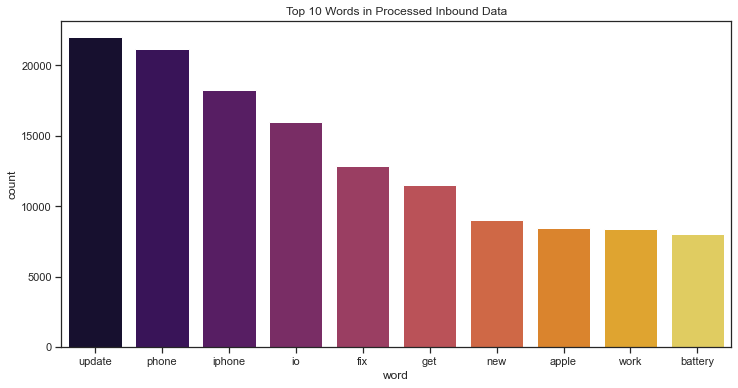

In [6]:
# Vectorizing the data with Count Vectorizer
bagofwords = CountVectorizer(min_df = 5).fit(string_processed_inbound)
inbound_cv = bagofwords.transform(string_processed_inbound)

# For visualizing top 10
def top10_bagofwords(data, output_name, title):
    ''' Taking as input the data and plots the top 10 words based on counts in this text data'''
    bagofwords = CountVectorizer()
    # Output will be a sparse matrix
    inbound = bagofwords.fit_transform(data)
    # Inspecting of often contractions and colloquial language is used
    word_counts = np.array(np.sum(inbound, axis=0)).reshape((-1,))
    words = np.array(bagofwords.get_feature_names())
    words_df = pd.DataFrame({"word":words, 
                             "count":word_counts})
    words_rank = words_df.sort_values(by="count", ascending=False)
    # words_rank.to_csv('words_rank.csv') # Storing it in a csv so I can inspect and go through it myself
    words_rank.head()
    # Visualizing top 10 words
    plt.figure(figsize=(12,6))
    sns.barplot(words_rank['word'][:10], words_rank['count'][:10].astype(str), palette = 'inferno')
    plt.title(title)
    
    # Saving
    plt.savefig(f'visualizations/{output_name}.png')
    
    plt.show()


top10_bagofwords(string_processed_inbound, 'initial_frequencies', 'Top 10 Words in Processed Inbound Data')

Êàë‰∏ªË¶Å‰ΩøÁî®ËÆ°Êï∞ÂêëÈáèÂô®Êù•Êü•ÁúãÂú®ÁâπÂÆöÊï∞ÊçÆÈõÜ‰∏≠Âá∫Áé∞ÁöÑÂâç10‰∏™ÂçïËØçÔºåÂπ∂Âú®ËøôÈáåËøõË°åÂèØËßÜÂåñ„ÄÇ

‰ªé‰∏äÈù¢ÁöÑÂèØËßÜÂåñ‰∏≠ÔºåÊàëÂèØ‰ª•ÁúãÂá∫Â§ßÈÉ®ÂàÜÁöÑÂÆ¢Êà∑Êü•ËØ¢ÈÉΩÊòØÂÖ≥‰∫éÊâãÊú∫ÁöÑÔºåÁâπÂà´ÊòØiOSÂíåÁîµÊ±†‰øÆÂ§ç„ÄÇÊàë‰ª¨‰πüÁúãÂà∞‚ÄúË∞¢Ë∞¢‚ÄùÊéíÂêçÁõ∏ÂΩìÈ´òÔºåËøôÊòØ‰∏Ä‰ª∂Â•Ω‰∫ãÔºåÂõ†‰∏∫ÂÆÉÂèØËÉΩË°®Á§∫ÊÑüÊøÄÔºàËøôË°®Á§∫ÊàëÁöÑËÅäÂ§©Êú∫Âô®‰∫∫ÁöÑÁªìÊùüÊÑèÂõæÔºâ„ÄÇ"Hi"ÔºàÊéíÂêç44ÔºâÂíå"hey"ÔºàÊéíÂêç25ÔºâË¢´ÂàÜÁ±ª‰∏∫ÈóÆÂÄôÊÑèÂõæÔºåÁúãÂà∞ÂÆÉ‰ª¨Âá∫Áé∞ÁöÑÊ¨°Êï∞ÂæàÂ§öÔºåËøôÊòØ‰∏Ä‰ª∂Â•Ω‰∫ã„ÄÇÁé∞Âú®‰∫ãÊÉÖÁúãËµ∑Êù•ÂæàÊúâÂ∏åÊúõÔºå‰ΩÜÊàë‰ª¨Âú®ÂÆûÈôÖÂºÄÂßãËÅöÁ±ª‰πãÂâçÊó†Ê≥ïÁúãÂà∞Ë¥®Èáè„ÄÇ

### 2.TFIDF

In [7]:
tfidf = TfidfVectorizer(min_df=5, ngram_range = (1,3))
# Storing tfidf data and transforming them into sparse matrices
inbound_tfidf = tfidf.fit_transform(string_processed_inbound)
inbound_tfidf

<77175x34110 sparse matrix of type '<class 'numpy.float64'>'
	with 1259391 stored elements in Compressed Sparse Row format>

## Pretrained word embeddings

ËØçË¢ãÊ®°Âûã‰∏¢Â§±‰∫ÜËÆ∏Â§öÁªÜÂæÆ‰πãÂ§ÑÔºåÂ¶ÇËØçÂ∫è„ÄÇËøôÂ∞±ÊòØÊàëÂ∞ÜÂ∞ùËØïËøô‰∫õÂÖ∂‰ªñÊñáÊú¨ÂêëÈáèÂåñÊñπÊ≥ïÁöÑÂéüÂõ†„ÄÇÁé∞Âú®Êàë‰ª¨Êúâ‰∫ÜÊõ¥ÊúâÊïàÁöÑÊñπÊ≥ïÔºåÁâπÂà´ÊòØÂõ†‰∏∫ÊàëÊÉ≥Âú®Ëøô‰∫õÂêëÈáè‰∏≠ÁºñÁ†ÅÁöÑÊòØÊÑèÂõæÈõÜÁæ§„ÄÇ

### 3. GloVe
ÊàëÂ∞Ü‰ΩøÁî®Â§öÁßçËØçÂµåÂÖ•ÊñπÊ≥ï‰ª•‰∏çÂêåÁöÑÊñπÂºèÂêëÈáèÂåñÊàëÁöÑÊñáÊú¨ÔºåÁÑ∂ÂêéÊµãËØïÂì™ÁßçËØçÂµåÂÖ•ÊñπÊ≥ïÊúÄÂ•ΩÔºåÈ¶ñÂÖà‰ªéGloVeËØçÂµåÂÖ•ÂºÄÂßã„ÄÇGloVeÊòØ‰∏ÄÁßçËé∑ÂèñËØçÂêëÈáèË°®Á§∫ÁöÑÊó†ÁõëÁù£Â≠¶‰π†ÁÆóÊ≥ï„ÄÇ

GensimÈôêÂà∂‰∫ÜÈ¢ÑËÆ≠ÁªÉÁöÑËØçÂµåÂÖ•ÔºåÂπ∂Êúâ‰∏ÄÁßçÁâπÊÆäÁöÑÊï∞ÊçÆÊ†ºÂºèÔºå‰Ω†ÂèØ‰ª•Âü∫Êú¨‰∏äÂ∞ÜÂÖ∂Âä†ËΩΩ‰∏∫numpyÊï∞ÁªÑ„ÄÇ

ÂÖçË¥£Â£∞ÊòéÔºöÊàë‰∏ç‰ºö‰ΩøÁî®Ëøô‰∏™ÔºåÂõ†‰∏∫ÊàëÁöÑËÅöÁ±ªÁÆóÊ≥ïÂè™Âú®ÊØèÊù°Êé®ÊñáÊòØ‰∏Ä‰∏™ÁÇπÊó∂ÊâçÂ∑•‰ΩúÔºåËÄåËøôÊòØ‰∏Ä‰∏™ËØçËΩ¨Êç¢Âô®„ÄÇÊàëÂ∞ÜËøôÈÉ®ÂàÜÁïôÂú®ÊàëÁöÑÁ¨îËÆ∞Êú¨‰∏≠‰Ωú‰∏∫ËøõÂ∫¶ËÆ∞ÂΩï„ÄÇ

Useful sources for this step: 
* [Guide to word to vec word embeddings](https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92)
* Zeugma Docs
    * https://pypi.org/project/zeugma/0.41/
    * https://github.com/nkthiebaut/zeugma

## 4. Doc2Vec
Áî±‰∫éËøôÊòØÊàëÂ∞ÜÁî®‰∫éÁÆ°ÈÅìÁöÑ‰∏ªË¶ÅÂµåÂÖ•ÊñπÊ≥ïÔºåÊàëÂú®‰∏ã‰∏Ä‰∏™Á¨îËÆ∞Êú¨‰∏≠Â±ïÁ§∫‰∫ÜÊàëÂ¶Ç‰ΩïÂà©Áî®Ëøô‰∏™ÂµåÂÖ•ÊñπÊ≥ï„ÄÇ

## 5. Hugging Face
ËøôÊòØ‰∏ÄÂÆ∂‰∏ìÊ≥®‰∫éËá™ÁÑ∂ËØ≠Ë®ÄÂ§ÑÁêÜÁöÑÂàùÂàõÂÖ¨Âè∏„ÄÇÊàëÊé¢Á¥¢‰∫Ü‰ªñ‰ª¨ÁöÑÁºñÁ†ÅÂô®„ÄÇ

BERTÂπ∂‰∏çÊòØ‰∏Ä‰∏™ÂæàÂ•ΩÁöÑÈÄâÊã©ÔºåÂõ†‰∏∫ÂÖ∂‰∏≠ÁöÑÂ§ßÈÉ®ÂàÜÂÜÖÂÆπÊòØ‰ΩøÁî®Áª¥Âü∫ÁôæÁßëÊï∞ÊçÆËÆ≠ÁªÉÁöÑ„ÄÇ

Êàë‰∏çÁ°ÆÂÆödoc2vecÊòØÂü∫‰∫é‰ªÄ‰πàËÆ≠ÁªÉÁöÑÔºåÊàëËÆ§‰∏∫Â¶ÇÊûúÊàëËÉΩÊâæÂà∞Âü∫‰∫éTwitterÁöÑËØçÂµåÂÖ•ÔºåÊàëÁöÑÁªìÊûú‰ºöÊõ¥Â•ΩÔºÅ

## 6. Fast-text 


# Scaling the Data

Âú®Êàë‰ª¨ËøõË°åËÅöÁ±ª‰πãÂâçÔºåËÆ©Êàë‰ª¨È¶ñÂÖàÂà∂‰ΩúÊï∞ÊçÆÈõÜÁöÑÁº©ÊîæÁâàÊú¨ÔºåËøôÂØπ‰∫éÂü∫‰∫éË∑ùÁ¶ªÁöÑËÅöÁ±ªÊñπÊ≥ï‰ºöÂæàÊúâÂ∏ÆÂä©„ÄÇ‰∏ÄËà¨Êù•ËØ¥ÔºåËøô‰∫õÂêëÈáèÂÆûÈôÖ‰∏ä‰∏çÈúÄË¶ÅÁº©ÊîæÔºå‰ΩÜËøôÂèØËÉΩÊúâÂä©‰∫éËÆ°ÁÆóÁõÆÁöÑ„ÄÇÊàëÂè™ÂØπÊàëÁöÑËÆ°Êï∞ÂêëÈáèÂåñÂíåtfidfÂêëÈáèÂåñÊï∞ÊçÆËøõË°åËøôÊ†∑ÁöÑÂ§ÑÁêÜÔºåËÄå‰∏çÊòØÂØπÂÖ∑ÊúâÊõ¥ÊúâÊÑè‰πâÁöÑËØçÂµåÂÖ•ÁöÑÊï∞ÊçÆËøõË°åÂ§ÑÁêÜ„ÄÇ

In [8]:
# This is the data we have so far, they are stored in CSR compressed format
inbound_cv, inbound_tfidf

(<77175x4893 sparse matrix of type '<class 'numpy.int64'>'
 	with 768941 stored elements in Compressed Sparse Row format>,
 <77175x34110 sparse matrix of type '<class 'numpy.float64'>'
 	with 1259391 stored elements in Compressed Sparse Row format>)

In [9]:
# Fitting and transforming to create standard scaled versions of my data
inbound_cv_ma = MaxAbsScaler().fit_transform(inbound_cv)
inbound_tfidf_ma = MaxAbsScaler().fit_transform(inbound_cv)

inbound_cv_ma, inbound_tfidf_ma

(<77175x4893 sparse matrix of type '<class 'numpy.float64'>'
 	with 768941 stored elements in Compressed Sparse Row format>,
 <77175x4893 sparse matrix of type '<class 'numpy.float64'>'
 	with 768941 stored elements in Compressed Sparse Row format>)

**ËÆ≠ÁªÉËÄÉËôëÔºö**Âõ†‰∏∫ÊàëÂ∞ÜÂú®È°πÁõÆÁöÑ‰∏ã‰∏ÄÈÉ®ÂàÜËÆ≠ÁªÉÁ•ûÁªèÁΩëÁªúÔºåÊâÄ‰ª•ÊàëÁöÑÁõÆÊ†áÊòØÊã•ÊúâÂ§ßÁ∫¶10‰∏™ÊÑèÂõæÔºàÈÄöËøáEDAÔºåÂèñÂÜ≥‰∫éÊï∞ÊçÆ‰∏≠Ëá™ÁÑ∂ÊÑèÂõæÁöÑÂÆûÈôÖÊï∞ÈáèÔºâ„ÄÇÂØπ‰∫éËøô10‰∏™ÊÑèÂõæ‰∏≠ÁöÑÊØè‰∏Ä‰∏™ÔºåÊàëÊÉ≥‰∏∫ÊØè‰∏™ÊÑèÂõæÊèê‰æõÂ§ßÁ∫¶1000‰∏™Á§∫‰æã„ÄÇÊàëÈÄâÊã©Ëøô‰∏™ÁâπÂÆöÁöÑÊï∞Â≠óÊòØÂõ†‰∏∫ÊàëÂ∏åÊúõÊØè‰∏™ÊÑèÂõæÁöÑ‰æãÂ≠êÂàÜÂ∏ÉÂùáÂåÄÔºåËøôÊ†∑ÊàëÂ∞±‰∏ç‰ºöÂá∫Áé∞Á±ª‰∏çÂπ≥Ë°°ÔºåËÄå‰∏îÊàëÁöÑÁ•ûÁªèÁΩëÁªúÂèØ‰ª•Áõ∏ÂØπËæÉÂ•ΩÂú∞ÂØπËøôÂçÅ‰∏™Á±ªËøõË°åÂàÜÁ±ª„ÄÇ


ËÄÉËôëÂà∞Ëøô‰∏ÄÁÇπÔºåËÆ©Êé¢Á¥¢ÂºÄÂßãÂêßÔºÅ

ÊàëÂ∞ÜÂ∞ùËØïÂú®ÊàëÁöÑÊï∞ÊçÆ‰∏ä‰ΩøÁî®ËÅöÁ±ªÊñπÊ≥ïÂíå‰∏ªÈ¢òÂª∫Ê®°Êù•ÊèêÂèñ‰∏ªË¶Å‰∏ªÈ¢òÂπ∂ÊâãÂä®Ê†áËÆ∞Ëøô‰∫õËÅöÁ±ª„ÄÇ

Â¶ÇÊûúÊàëÁöÑÊï∞ÊçÆÈÉΩÂú®Âêå‰∏ÄÁ±ªÂûãÁöÑÂÆ¢Êà∑ÊúçÂä°È¢ÜÂüüÔºåÊàë‰ºöÂèñÂæóÊõ¥Â§ßÁöÑÊàêÂäüÔºåËÄå‰∏îÊàëÂæàÂ∞èÂøÉÂú∞Á°Æ‰øùÊé®Áâπ-ËãπÊûúÁöÑÊï∞ÊçÆÊòØËøôÊ†∑ÁöÑ„ÄÇËøôÊ†∑ÔºåÊàëÂú®‰∏ã‰∏Ä‰∏™Á¨îËÆ∞Êú¨ÁîµËÑë‰∏≠ÁöÑÊ®°ÂûãÂ∞ÜÊçïÊçâÂà∞ÊÑèÂõæÂàÜÁ±ªÁöÑÁªÜÂæÆÂ∑ÆÂà´„ÄÇ‰∏ÄËà¨Êù•ËØ¥ÔºåÊú∫Âô®‰∫∫‰ºöÊìÖÈïøÁî®ÂÆÉÊâÄËÆ≠ÁªÉÁöÑËØ≠Ë®ÄË∞àËÆ∫ËØùÈ¢ò„ÄÇ

ÊàëÁü•ÈÅìÔºå‰ΩøÁî®ÈõÜÁæ§ÔºåÊÇ®‰∏çËÉΩÊúüÊúõÊÇ®ÁöÑÊ®°Âûã‰ª•È¢ÑÂÖàÈõÜÁæ§ÁöÑÊñπÂºèÂØπÊï∞ÊçÆËøõË°åÈõÜÁæ§„ÄÇËøôÊòØ‰∏Ä‰∏™Êï¥‰ΩìÁÆóÊ≥ï„ÄÇÊàëÂ∏åÊúõ‰ªñ‰ª¨ËÉΩÁ•ûÂ•áÂú∞Â∞ÜÊÑèÂõæËΩªÊùæÂú∞ËÅöÈõÜÂú®‰∏ÄËµ∑ÔºåÁÑ∂ËÄåÁé∞Âú®ÂèØËÉΩÂ∞±ÈÇ£‰πàÂÆπÊòì‰∫ÜÔºÅÊàë‰ª¨Êã≠ÁõÆ‰ª•ÂæÖ„ÄÇ

## <font color='blue'>1. K Means</color>
ÊàëÂØπÂçïËØçÂêëÈáèËøõË°åËÅöÁ±ªÁöÑÁ¨¨‰∏ÄÁßçÊñπÊ≥ïÊòØK-MeansÔºåÂÆÉÂæÄÂæÄÂú®Blob‰∏äË°®Áé∞ËâØÂ•Ω„ÄÇ

Áº∫ÁÇπÊòØÂÆÉÈùûÂ∏∏ÊÖ¢ÔºåËÄå‰∏îÂæàÈöæÈÄâÊã©KÁöÑÂÄº‚Äî‚ÄîÊàëÁîöËá≥‰∏çÁü•ÈÅìÊï∞ÊçÆ‰∏≠ÊúâÂ§öÂ∞ëÊÑèÂõæ„ÄÇËøôÂ∞±ÊòØ‰∏∫‰ªÄ‰πàÊàë‰ªéKÁöÑËæÉÂ§ßË∑≥Ë∑ÉÂºÄÂßãÔºå‰ª•Ëé∑ÂæóÂì™‰∏Ä‰∏™Ë°®Áé∞ÊúÄÂ•ΩÁöÑÊõ¥È´òÂ±ÇÊ¨°ÁöÑÊÉ≥Ê≥ïÔºåÁÑ∂ÂêéÊàëÊ∑±ÂÖ•Á†îÁ©∂ÔºåÊúÄÁªàÂÜ≥ÂÆö‰ªÄ‰πàKÊúÄÈÄÇÂêàÂú®ÊàëÁöÑÊï∞ÊçÆÈõÜ‰∏≠ÊâæÂà∞ÊúÄ‰Ω≥ÊÑèÂõæÊï∞Èáè„ÄÇ

## 1.1. ÊàëÁöÑTFIDFÂíåËÆ°Êï∞Áü¢ÈáèÂåñÊï∞ÊçÆÁöÑK-Means
È¶ñÂÖàÔºåÊàëÂØπTFIDFÂíåËÆ°Êï∞Áü¢ÈáèÂåñÊï∞ÊçÆËøõË°å‰∫ÜËÅöÁ±ª„ÄÇËÄÅÂÆûËØ¥ÔºåÊàë‰∏ç‰ºöÁúüÁöÑÊúüÊúõÂÆÉËÉΩÂ∏¶Êù•Â•ΩÁöÑÁªìÊûúÔºåÊâÄ‰ª•Êàë‰∏ç‰ºöËä±ÂæàÂ§öÁ≤æÂäõÂú®Ëøô‰∏§‰∏™ÊñπÈù¢ËøõË°åÂÆûÈôÖÁöÑËÅöÁ±ª„ÄÇ‰ΩÜÂÄºÂæó‰∏ÄËØïÔºå‰ª•ËØÅÊòé‰∏ÄÁßçËæÉËÄÅ‰∏îÊ¨°‰ºòÁöÑÊñπÊ≥ï„ÄÇ

In [10]:
# Vectorized data
vectorized_data = {'inbound_cv_ma': inbound_cv_ma, 'inbound_tfidf_ma': inbound_tfidf_ma}
# Briefly showing the contents of i and j
for i,j in enumerate(vectorized_data.items()): print(i,j);

0 ('inbound_cv_ma', <77175x4893 sparse matrix of type '<class 'numpy.float64'>'
	with 768941 stored elements in Compressed Sparse Row format>)
1 ('inbound_tfidf_ma', <77175x4893 sparse matrix of type '<class 'numpy.float64'>'
	with 768941 stored elements in Compressed Sparse Row format>)


ÊàëÊ≠£Âú®ÂØπËøôÈáåÁöÑÊâÄÊúâÊï∞ÊçÆËøêË°åÊàëÁöÑÊï¥‰∏™K-Means„ÄÇÊàëÊ≠£Âú®ÂØπn_clustersËøõË°åË∂ÖÂèÇÊï∞‰ºòÂåñ„ÄÇÁ¨¨‰∏Ä‰∏™ËøõÂ∫¶Êù°ÊòØÂÆÉÂ¶Ç‰ΩïÂ§ÑÁêÜÊï∞ÊçÆÈõÜÔºåÁ¨¨‰∫å‰∏™ÊòØÂÆÉÂÆåÊàê‰∫ÜÊâÄÊúân_clusters„ÄÇ

Âú®Áº©Êîæ‰πãÂâçÔºåÊàëËä±‰∫Ü‰∏â‰∏™Â∞èÊó∂Âú®10Âà∞100ÁöÑ10Ê¨°Ëø≠‰ª£‰∏≠ÂØπËøô‰∏§ÁßçÊï∞ÊçÆÁ±ªÂûãÂ∫îÁî®K-Means„ÄÇÂπ∏ËøêÁöÑÊòØÔºåÂú®ÊàëÊîÄÁôª‰πãÂêéÔºåÂÆÉËÆ≠ÁªÉÂæóÊõ¥Âø´‰∫Ü„ÄÇ

Êàë‰ΩøÁî®PythonÁöÑÂ∫èÂàóÂåñÂåÖPickleÂ∞ÜÁªìÊûúÂ≠òÂÇ®Âú®Ëøô‰∏™ÂçïÂÖÉÊ†º‰∏ãÈù¢ÔºåËøôÊ†∑ÊàëÂ∞±‰∏çÂøÖÂÜçËøêË°åÂÆÉ‰∫ÜÔºÅ

In [11]:
%%time
# My grand dictionaries that will store all my results
wcss_grand = {}
labels_grand = {}
silhouette_scores_grand = {}
# n_clusters = [10,20,30,40,50,60,70,80,90,100]
n_clusters = [10]

# Iterating through all the differently embedded data
for i,j in tqdm(enumerate(vectorized_data.items())): 
    name = j[0] # Here j[0] is the name of the dataset
    dataset = j[1] # And j[1] is the actual data
    
    # I store my metrics at these following lists
    wcss = []
    labels = []
    silhouette_scores = []
    
    # Looping through values of k
    for k in tqdm(n_clusters):    
        print(f'Currently fitting {name} with {k} clusters... Please wait')
        
        # Initializing with k-means++ ensures that you get don‚Äôt fall into the random initialization trap.
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state = 10)
        kmeans.fit(dataset)
        wcss.append(kmeans.inertia_)
        
        # Getting the silhouette score
        labels.append(kmeans.labels_)
        silhouette_scores.append(silhouette_score(dataset, kmeans.labels_))
        
        # Saving the models
        filename = f'models/kmeans/{name}-{k}neighbors.sav'
        joblib.dump(kmeans, filename)
        
    # Updating grand dictionary
    wcss_grand[name + '_wcss'] = wcss
    labels_grand[name + '_labels'] = labels
    silhouette_scores_grand[name + '_silhouettes'] = silhouette_scores

# Saving all my results
with open('objects/wcss_grand.pkl', 'wb') as handle:
    pickle.dump(wcss_grand, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('objects/labels_grand.pkl', 'wb') as handle:
    pickle.dump(labels_grand, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('objects/silhouette_scores_grand.pkl', 'wb') as handle:
    pickle.dump(silhouette_scores_grand, handle, protocol=pickle.HIGHEST_PROTOCOL)

<timed exec>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

<timed exec>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?it/s]

Currently fitting inbound_cv_ma with 10 clusters... Please wait


<timed exec>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?it/s]

Currently fitting inbound_tfidf_ma with 10 clusters... Please wait
CPU times: user 4min 22s, sys: 1min 2s, total: 5min 25s
Wall time: 4min 31s


### Reading back in the results

In [12]:
# Storing it into objects I can use in this notebook

with open('objects/wcss_grand.pkl', 'rb') as handle:
    wcss_grand = pickle.load(handle)
with open('objects/labels_grand.pkl','rb') as handle:
    labels_grand = pickle.load(handle)
with open('objects/silhouette_scores_grand.pkl','rb') as handle:
    silhouette_scores_grand = pickle.load(handle)

## ÂØªÊâæÊúÄ‰Ω≥K-MeansÊ®°Âûã

ÊàëÊ≠£Âú®Áîª‰∏Ä‰∏™ËÇòÈÉ®ÂõæÔºåÁúãÁúãÊòØÂê¶Êúâ‰∏Ä‰∏™Ê∏ÖÊô∞ÁöÑËÇòÈÉ®ÔºåÂ∏åÊúõÊàëËÉΩÊâæÂà∞Ôºå‰ΩÜÂèØËÉΩÊÄß‰∏çÂ§ß„ÄÇ

ÊàëÈ¶ñÂÖàÂØπ**count‰∏™Áü¢ÈáèÂåñÁöÑ**Êï∞ÊçÆËøõË°åÂ§ÑÁêÜÔºåÁÑ∂ÂêéÂØπ**tfidf**Áü¢ÈáèÂåñÁöÑÊï∞ÊçÆËøõË°åÂ§ÑÁêÜÔºö

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

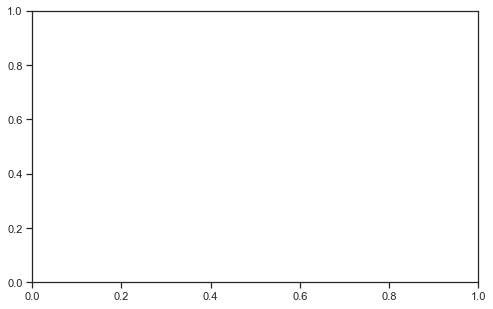

In [13]:
# Elbow Plot count vectorized
plt.figure(figsize=(8,5))
plt.plot(range(10, 101, 10), wcss_grand['inbound_cv_ma_wcss'], color = 'magenta')
plt.title('Elbow Method (Count Vectorized)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Elbow Plot tfidf
plt.figure(figsize=(8,5))
plt.plot(range(10, 101, 10), wcss_grand['inbound_tfidf_ma_wcss'], color = 'magenta')
plt.title('Elbow Method (TFIDF)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silouette Plot count vectorized
plt.figure(figsize=(8,5))
plt.plot(range(10, 101, 10), silhouette_scores_grand['inbound_cv_ma_silhouettes'], color = 'red')
plt.title('Silhouette Method (Count Vectorized)')
plt.xlabel('Silhouette Score')
plt.ylabel('WCSS')
plt.show()

# Silouette Plot tfidf
plt.figure(figsize=(8,5))
plt.plot(range(10, 101, 10), silhouette_scores_grand['inbound_tfidf_ma_silhouettes'], color = 'red')
plt.title('Silhouette Method (TFIDF)')
plt.xlabel('Silhouette Score')
plt.ylabel('WCSS')
plt.show()

Êàë‰ª¨ÁúãÂà∞Ëøô‰∫õÂõæÂú®TFIDFÂíåËÆ°Êï∞Áü¢ÈáèÂåñÊï∞ÊçÆ‰πãÈó¥Âπ∂Ê≤°ÊúâÂ§™Â§ßÂèòÂåñÔºåËøôËøõ‰∏ÄÊ≠•ËØ¥Êòé‰∫ÜÊàë‰∏äÈù¢ÁöÑËØ¥Ê≥ïÔºåÂç≥ÂÆÉ‰ª¨Âπ∂‰∏çÊòØÊúÄÊúâÁî®ÁöÑ„ÄÇ

## Áî®t-SNEÂèØËßÜÂåñÊàëÁöÑÈõÜÁæ§

ÊàëÂ∞ùËØï‰∏çÂêåÁöÑÈ¢úËâ≤Ë¥¥ÂõæÂπ∂ÈÄâÊã©‰∏Ä‰∏™ÔºåËøôÊ†∑Êõ¥ÂÆπÊòìÂå∫ÂàÜÁ∞á„ÄÇ

Available sequential colormaps:

```['viridis', 'plasma', 'inferno', 'magma', 'cividis']```

```['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']```

Available qualitative colormaps:
```['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']```

In [14]:
# Current data
inbound_cv_ma.shape, inbound_tfidf_ma.shape

((77175, 4893), (77175, 4893))

t-SNEÊòØ‰∏Ä‰∏™Ê¶ÇÁéáÊ®°ÂûãÔºåÊâÄ‰ª•ËøôÈúÄË¶Å‰∏Ä‰∫õÊó∂Èó¥ÔºåÁâπÂà´ÊòØÂõ†‰∏∫Êàë‰ª¨ÊúâÂ§ßÁ∫¶80kË°å„ÄÇ

In [15]:
%time
# Instantiate t-SNE
tsne = TSNE(n_components=2, random_state=1, n_jobs=-1)

# Fit t-SNE
inbound_cv_ma_tsne = tsne.fit_transform(inbound_cv_ma)

CPU times: user 2 ¬µs, sys: 1e+03 ns, total: 3 ¬µs
Wall time: 5.25 ¬µs


KeyboardInterrupt: 

In [ ]:
# Plotting my visualization for each of my n_neighbors with my count vectorized data

for k in range(10,101,10):
    # Getting the right K-Means cluster labels.
    labels = joblib.load(f'models/kmeans/inbound_cv_ma-{str(k)}neighbors.sav').labels_
    
    # Visualize high-dimensional data
    plt.figure(figsize=(13,12))
    plt.scatter(inbound_cv_ma_tsne[:,0], inbound_cv_ma_tsne[:,1], s=20, c = labels, cmap = 'magma')
    plt.title(f'2-D t-SNE Representation of my Count Vectorized Inbound data with {k} Clusters')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.show()

‰∏ÄÂºÄÂßãÊàë‰ª•‰∏∫ÊàëÁúüÁöÑÁúã‰∏çÂà∞‰ªª‰ΩïÊòüÂõ¢ÔºÅ‰ΩÜËØ∑ËÆ∞‰ΩèÔºåÊàëÊúâËøô‰πàÂ§öÊï∞ÊçÆÁÇπÔºåÊâÄ‰ª•ÊàëÂøÖÈ°ªÊääËøô‰∫õÈõÜÁæ§ÂÅöÂæóÂæàÂ§ß„ÄÇÂæàÈÖ∑ÁöÑÁªòÂõæÔºåÂ∞ΩÁÆ°Êàë‰ª¨ÁöÑÈ´òÁª¥Êï∞ÊçÆÁöÑ2DË°®Á§∫‰∏ç‰ºöÈùûÂ∏∏ÂáÜÁ°ÆÔºå‰ΩÜÊàë‰ª¨ËøòËøúËøúÊ≤°ÊúâÁúãÂà∞Ê∏ÖÊô∞ÁöÑËÅöÁ±ªÔºÅ

Êàë‰∏çÂ∏åÊúõÂÆÉÊúâÂ§™Â§ßÁöÑ‰∏çÂêåÔºå‰ΩÜËÆ©Êàë‰ª¨ÁúãÁúãÊàëÁöÑTFIDFÊï∞ÊçÆÁöÑÁõ∏ÂêåÂõæ„ÄÇ

In [ ]:
%time
# Instantiate t-SNE
tsne = TSNE(n_components=2, random_state=1, n_jobs=-1)

# Fit t-SNE
inbound_tfidf_ma_tsne = tsne.fit_transform(inbound_tfidf_ma)

In [ ]:
# Plotting my visualization for each of my n_neighbors with my tfidf data

for k in range(10,101,10):
    # Getting the right K-Means cluster labels.
    labels = joblib.load(f'models/kmeans/inbound_tfidf_ma-{str(k)}neighbors.sav').labels_
    
    # Visualize high-dimensional data
    plt.figure(figsize=(13,12))
    plt.scatter(inbound_tfidf_ma_tsne[:,0], inbound_tfidf_ma_tsne[:,1], s=20, c = labels, cmap = 'magma')
    plt.title(f'2-D t-SNE Representation of my TFIDF Inbound data with {k} Clusters')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.show()

Êûú‰∏çÂÖ∂ÁÑ∂ÔºåËøô‰∫õÁúãËµ∑Êù•ÁúüÁöÑÂæàÂÉèËÆ°Êï∞Áü¢ÈáèÂåñÈõÜÁæ§ÔºÅËÆ©Êàë‰ª¨ÁªßÁª≠ËÆ®ËÆ∫ÂçïËØçÂµåÂÖ•ÈõÜÁæ§ÔºåÊàëËÆ§‰∏∫ËøôÊõ¥ÊúâË∂£„ÄÇ

## 1.2. K-Means for my Doc2Vec data

ËØ∑Ê≥®ÊÑèÔºåÊàëÊ≤°ÊúâÊïÖÊÑèÁº©Êîæd2vÊï∞ÊçÆÔºåÂõ†‰∏∫Êàë‰∏çÊÉ≥Êâ≠Êõ≤È¢ÑËÆ≠ÁªÉÊ®°ÂûãÂàõÂª∫ÁöÑË∑ùÁ¶ª„ÄÇ

In [ ]:
# Vectorized data
vectorized_data = {'inbound_cv_d2v': inbound_d2v}
# Briefly showing the contents of i and j
for i,j in enumerate(vectorized_data.items()): print(i,j);

In [ ]:
# My d2v dictionaries that will store all my results
wcss_d2v = {}
labels_d2v = {}
silhouette_scores_d2v = {}
n_clusters = [10,20,30,40,50,60,70,80,90,100]

# Iterating through all the differently embedded data
for i,j in tqdm(enumerate(vectorized_data.items())): 
    name = j[0] # Here j[0] is the name of the dataset
    dataset = j[1] # And j[1] is the actual data
    
    # I store my metrics at these following lists
    wcss = []
    labels = []
    silhouette_scores = []
    
    # Looping through values of k
    for k in tqdm(n_clusters):    
        print(f'Currently fitting {name} with {k} clusters... Please wait')
        
        # Initializing with k-means++ ensures that you get don‚Äôt fall into the random initialization trap.
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state = 10)
        kmeans.fit(dataset)
        wcss.append(kmeans.inertia_)
        
        # Getting the silhouette score
        labels.append(kmeans.labels_)
        silhouette_scores.append(silhouette_score(dataset, kmeans.labels_))
        
        # Saving the models
        filename = f'models/kmeans/{name}-{k}neighbors.sav'
        joblib.dump(kmeans, filename)
        
    # Updating d2v dictionary
    wcss_d2v[name + '_wcss'] = wcss
    labels_d2v[name + '_labels'] = labels
    silhouette_scores_d2v[name + '_silhouettes'] = silhouette_scores

# Saving all my results, now with a d2v tag
with open('objects/wcss_d2v.pkl', 'wb') as handle:
    pickle.dump(wcss_d2v, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('objects/labels_d2v.pkl', 'wb') as handle:
    pickle.dump(labels_d2v, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('objects/silhouette_scores_d2v.pkl', 'wb') as handle:
    pickle.dump(silhouette_scores_d2v, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Reading back in the results.

In [ ]:
# Storing it into objects I can use in this notebook

with open('objects/wcss_d2v.pkl', 'rb') as handle:
    wcss_d2v = pickle.load(handle)
with open('objects/labels_d2v.pkl','rb') as handle:
    labels_d2v = pickle.load(handle)
with open('objects/silhouette_scores_d2v.pkl','rb') as handle:
    silhouette_scores_d2v = pickle.load(handle)

Here are my plots:

In [ ]:
# Elbow Plot d2v
plt.figure(figsize=(8,5))
plt.plot(range(10, 101, 10), wcss_d2v['inbound_cv_d2v_wcss'], color = 'magenta')
plt.title('Elbow Method (Doc2Vec)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silouette Plot d2v
plt.figure(figsize=(8,5))
plt.plot(range(10, 101, 10), silhouette_scores_d2v['inbound_cv_d2v_silhouettes'], color = 'red')
plt.title('Silhouette Method (Doc2Vec)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Great, now we see that we have a slightly higher silhouette score which isn't negative now. It looks like K = 20 would be the best in this case as it has the highest silhouette score and there is sort of an elbow in the elbow plot, definitely more than at 80 clusters where it seems to be completely smooth.

In [ ]:
%time
# Instantiate t-SNE
tsne = TSNE(n_components=2, random_state=1, n_jobs=-1)

# Fit t-SNE
inbound_d2v_tsne = tsne.fit_transform(inbound_d2v)

In [ ]:
# Plotting my visualization for each of my n_neighbors, now with Doc2Vec embedded data

for k in range(10,101,10):
    # Getting the right K-Means cluster labels.
    labels = joblib.load(f'models/kmeans/inbound_cv_d2v-{str(k)}neighbors.sav').labels_
    
    # Visualize high-dimensional data
    plt.figure(figsize=(13,12))
    plt.scatter(inbound_d2v_tsne[:,0], inbound_d2v_tsne[:,1], s=20, c = labels, cmap = 'magma')
    plt.title(f'2-D t-SNE Representation of my Doc2Vec Inbound data with {k} Clusters')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.show()

Âü∫‰∫ét-SNEÂõæÂæàÈöæÂà§Êñ≠ÔºåÂõ†Ê≠§ÔºåÊàëÂ∞ÜÂú®ÂêéÈù¢ÁöÑÈÉ®ÂàÜÈÄöËøáÂÆûÈôÖÊü•ÁúãÊ†áÁ≠æÊù•ËØÑ‰º∞ÂÆÉÊòØÂ¶Ç‰ΩïËÅöÈõÜÁöÑÔºÅ

## <font color = 'blue'>2. LDA (Latent Dirichlet Allocation) </color>
ÊàëÁöÑÁ¨¨‰∫åÁßçËÅöÁ±ªÊñπÊ≥ïÊòØLDA‰∏ªÈ¢òÂª∫Ê®°„ÄÇÂÆÉÂü∫Êú¨‰∏ä‰ºöËé∑ÂèñÊÇ®ÁöÑÊï∞ÊçÆÂπ∂Â∞ÜÂÖ∂ÊãÜÂàÜ‰∏∫Â§ö‰∏™‰∏ªÈ¢ò„ÄÇÊàëÁöÑÁõÆÊ†á‰ªçÁÑ∂ÊòØÈõÜÁæ§Ôºå‰ΩÜÈÄöËøáËøôÁßçÊñπÊ≥ïÔºåÊàëÂ∏åÊúõËé∑ÂæóÊõ¥ÊúâÁî®„ÄÅÊõ¥Áã¨ÁâπÁöÑ‰∏ªÈ¢ò„ÄÇ


Useful articles:
* https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
* https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

ËøòÊúâ‰∏Ä‰∫õÊñ∞ÁöÑ„ÄÅÂü∫‰∫éÊ∑±Â∫¶Â≠¶‰π†ÁöÑÊñπÊ≥ïÔºåÁß∞‰∏∫LDA2VecÔºå‰πüÂèØËÉΩÂæàÊúâÂÖ¥Ë∂£Êé¢Á¥¢„ÄÇ

ÁÑ∂ËÄåÔºåÁî±‰∫éÊØî‰æãÁöÑÂèòÂåñÔºåÊàëÂ∞ÜÊääËøô‰∏ÄÊ≠•‰Ωú‰∏∫Êú™Êù•ÁöÑ‰∏ÄÊ≠•„ÄÇ

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [ ]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

Âá∫‰∫éÊó∂Èó¥ÈôêÂà∂ÁöÑËÄÉËôëÔºåÊàëÂÜ≥ÂÆö‰∏ç‰ΩøÁî®DBScanÔºåÂõ†‰∏∫ÂÆÉ‰ª¨Â∞ÜËé∑ÂæóÁ±ª‰ºº‰∫éK-MeansÁöÑËÅöÁ±ªÁªìÊûú„ÄÇÊàë‰πüÂèØ‰ª•‰ΩøÁî®È´òÊñØÊ∑∑ÂêàÊ®°ÂûãÊàñHeirarchicalËÅöÁ±ªÊù•ÂÆûÁé∞Ëøô‰∏™ËÅöÁ±ªÁªìÊûú„ÄÇ

## ÂèëÁé∞Âπ∂ÂèØËßÜÂåñÈõÜÁæ§‰πãÈó¥ÁöÑÊÑèÂõæÂ∑ÆÂºÇ

ÊàëÊääÊàëÊâÄÊúâÁöÑÊ®°ÂûãÈÉΩ‰øùÂ≠òÂú®Ëøô‰∏™Âêç‰∏∫Êñá‰ª∂Â§πÁöÑÁõÆÂΩï‰∏≠ÁöÑ‰∏Ä‰∏™Êñá‰ª∂Â§π‰∏≠„ÄÇÊàëÊâÄË¶ÅÂÅöÁöÑÂ∞±ÊòØ‰∏∫ËØ•Ê®°ÂûãÈÄâÊã©‰∏Ä‰∏™Ë∂ÖÂèÇÊï∞ËÆæÁΩÆÔºåÂπ∂ÂèØËßÜÂåñËøô‰∫õËÅöÁ±ª‰∏≠ÁöÑÂçïËØç„ÄÇ

In [ ]:
processed_inbound

ÊàëËÆ§‰∏∫Êü•ÁúãÈõÜÁæ§‰∏≠ÁöÑÂâç10‰∏™ÂçïËØçÈùûÂ∏∏ÊúâÁî®ÔºåÂèØ‰ª•ÂæàÂ•ΩÂú∞‰∫ÜËß£ÈõÜÁæ§‰∏≠ÁöÑÊÑèÂõæÔºÅ

### Using scattertext from the spaCy universe for EDA
This [kernel](https://www.kaggle.com/psbots/customer-support-meets-spacy-universehttps://www.kaggle.com/psbots/customer-support-meets-spacy-universe) showed me what spaCy's scattertext tool is capable of doing! So I wanted to do it myself as well to hopefully get useful insights.

Ê≠£Â¶ÇÊñáÊ°£‰∏≠ÊâÄËØ¥ÔºåÊï£ÁÇπÊñáÊú¨ÊòØ‚Äú‰∏ÄÁßçÂú®‰∏≠Â∞èÂûãËØ≠ÊñôÂ∫ì‰∏≠ÊâæÂà∞Âå∫Âà´ÊúØËØ≠ÁöÑÂ∑•ÂÖ∑ÔºåÂπ∂Áî®‰∏çÈáçÂè†ÁöÑÊúØËØ≠Ê†áÁ≠æÂú®ÊÄßÊÑüÁöÑ‰∫§‰∫íÂºèÊï£ÁÇπÂõæ‰∏≠ÂëàÁé∞ÂÆÉ‰ª¨„ÄÇ‚Äù

ËøôÂØπ‰∫éÊØîËæÉÊàëÂú®‰ª•‰∏ãÁ¨îËÆ∞Êú¨‰∏≠ÁöÑÊÑèÂõæÈõÜÁæ§‰πüÈùûÂ∏∏ÊúâÁî®„ÄÇ

In [ ]:
!ls models/kmeans

In [ ]:
labels = joblib.load(f'models/kmeans/inbound_cv_d2v-10neighbors.sav').labels_

# Scattertext for cluster evaluation

In [ ]:
corpus = st.CorpusFromParsedDocuments(love['Text'], category_col = 
                             parsed_col = 'parsed').build()

In [ ]:
# html = st.produce_scattertext_explorer(corpus,
#           category='British_Airways',
#           category_name='British Airways',
#           not_category_name='American Airlines',
#           width_in_pixels=600,
#           minimum_term_frequency=10,
#           term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
#           )

In [ ]:
# uncomment this cell to load the interactive scattertext visualisation
# filename = "americanAir-vs-britishAirways.html"
# open(filename, 'wb').write(html.encode('utf-8'))
# IFrame(src=filename, width = 800, height=700)

In [ ]:
### Using scattertext from the spaCy universe for EDA
This [kernel](https://www.kaggle.com/psbots/customer-support-meets-spacy-universehttps://www.kaggle.com/psbots/customer-support-meets-spacy-universe) showed me what spaCy's scattertext tool is capable of doing! So I wanted to do it myself as well to hopefully get useful insights.

As said in the docs, scatter-text is "a tool for finding distinguishing terms in small-to-medium-sized corpora, and presenting them in a sexy, interactive scatter plot with non-overlapping term labels."

This will be very useful for comparing my intent clusters in the following notebook as well.

corpus = st.CorpusFromParsedDocuments(processed_inbound,
                             parsed_col = 'parsed').build()

# html = st.produce_scattertext_explorer(corpus,
#           category='British_Airways',
#           category_name='British Airways',
#           not_category_name='American Airlines',
#           width_in_pixels=600,
#           minimum_term_frequency=10,
#           term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
#           )

# uncomment this cell to load the interactive scattertext visualisation
# filename = "americanAir-vs-britishAirways.html"
# open(filename, 'wb').write(html.encode('utf-8'))
# IFrame(src=filename, width = 800, height=700)def top10_bagofwords(data):
    ''' Taking as input the data and plots the top 10 words based on counts in this text data'''
    bagofwords = CountVectorizer()
    inbound = bagofwords.fit_transform(data)
    inbound # Output will be a sparse matrix
    # Inspecting of often contractions and colloquial language is used
    word_counts = np.array(np.sum(inbound, axis=0)).reshape((-1,))
    words = np.array(bagofwords.get_feature_names())
    words_df = pd.DataFrame({"word":words, 
                             "count":word_counts})
    words_rank = words_df.sort_values(by="count", ascending=False)
    # words_rank.to_csv('words_rank.csv') # Storing it in a csv so I can inspect and go through it myself
    words_rank.head()
    # Visualizing top 10 words
    plt.figure(figsize=(12,8))
    sns.barplot(words_rank['word'][:10], words_rank['count'][:10].astype(str), color = 'salmon')
    plt.title('Top 10 Most Common Words in My Data')
    plt.show()

# ÊàëÁöÑÊñπÊ≥ïÔºöÂêØÂèëÂºèÊÑèÂõæÂàÜÂ∏ÉÊé¢Á¥¢
ÊàëÈúÄË¶Å‰∫ÜËß£ÊàëÁöÑTwitterÊï∞ÊçÆ‰∏≠ÊúâÂ§öÂ∞ëÁúüÂÆûÁöÑÊÑèÂõæ„ÄÇÈÄöËøáÂÖ≥ÈîÆËØçÊù•ÂÅöÂèØËÉΩËØÅÊòéÊòØ‰∏Ä‰∏™ÂæàÂ•ΩÁöÑÂü∫Á∫øÊñπÊ≥ï„ÄÇÊàëÂü∫‰∫éËøô‰∏™ÊÉ≥Ê≥ïÔºåÈÄöËøáÂ∞ùËØïÊúÄÂ∞èÂåñÊÑèÂõæ‰∫§ÈõÜÊù•ËøõË°åÂêØÂèëÂºèÁöÑÊÑèÂõæËÅöÁ±ª„ÄÇÊàëÂ∞ùËØïÁî®ËøôÁßçÊñπÊ≥ïÊù•ÂΩíÁ∫≥Âá∫ÊúÄ‰∏∫Áã¨ÁâπÂíå_‰∫íÊñ•ÁöÑ_ÊÑèÂõæÈõÜÂêàÔºå‰ª•‰æøÊú∫Âô®‰∫∫ËÉΩÂ§üË¢´ËÆ≠ÁªÉÂå∫ÂàÜËøô‰∫õÊÑèÂõæ„ÄÇ

ÊàëÂèóÂà∞‰∫ÜÁúãÂà∞ÂÖ∂‰ªñËß£ÂÜ≥ÊñπÊ°àÁöÑÂêØÂèëÔºåÊØîÂ¶ÇcortexÁöÑÂÆûÁé∞Ôºå‰ªñ‰ª¨‰∏∫ÊØè‰∏™ÊÑèÂõæÂà∂‰Ωú‰∫Ü‰∏Ä‰∏™‚ÄúËØ≠‰πâÊåáÁ∫π‚Äù„ÄÇÊòæÁÑ∂ÔºåÈÇ£‰∫õÁªÜËäÇÊ≤°ÊúâÂàÜ‰∫´Ôºå‰ΩÜËøôË∂≥‰ª•ËÆ©ÊàëÂ∞ùËØïÊÉ≥Âá∫Ëá™Â∑±ÁöÑËß£ÂÜ≥ÊñπÊ°à„ÄÇÊúÄÂàùÔºåÊàëÊâìÁÆó‰ªéËÅöÁ±ª‰∏≠ÂàÜÂá∫Êù•ÔºåÂπ∂Â∞ùËØïÊâãÂä®ÊåëÈÄâ1000‰∏™‰æãÂ≠êÔºå‰ΩÜËøôÂπ∂‰∏çÊòØ‰∏Ä‰∏™ÊòéÊô∫ÁöÑ‰∏ªÊÑèÔºåËÄå‰∏îÈùûÂ∏∏Âä≥Âä®ÂØÜÈõÜ„ÄÇ

Ëøô‰∏™Á¨îËÆ∞Êú¨ÊòØÊàëËé∑ÂèñÊÑèÂõæÂàÜÁ±ªËÆ≠ÁªÉÊï∞ÊçÆÁöÑÊñπÂºè„ÄÇ

In [13]:
import pandas as pd
print(f'pandas: {pd.__version__}')
import numpy as np
print(f'numpy: {np.__version__}')
# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Making my visualizations pretty
sns.set_style('whitegrid')
# Combination exploration
import itertools
import yaml

# Loading back processed data
processed = pd.read_pickle('objects/processed.pkl')
print(f'\ninbound:\n{processed.head()}')

pandas: 1.2.3
numpy: 1.21.0

inbound:
                                    Processed Inbound  \
0   [new, update, iÔ∏è, make, sure, download, yester...   
6   [hey, anyone, else, upgraded, io, issue, capit...   
12  [hello, internet, someone, explain, symbol, ke...   
13  [get, screenshot, say, iphonex, reserve, email...   
15  [thank, update, phone, even, slow, barely, wor...   

                                         Real Inbound  \
0   @AppleSupport The newest update. IÔ∏è made sure ...   
6   Hey @AppleSupport and anyone else who upgraded...   
12  Hello, internet. Can someone explain why this ...   
13  @AppleSupport I‚Äôve got a screenshot saying my ...   
15  Thank you @AppleSupport I updated my phone and...   

                                        Real Outbound  
0   @115854 Lets take a closer look into this issu...  
6   @115856 Hey, let's work together to figure out...  
12  @115861 You're in the right place; we'll do al...  
13  @115863 Go ahead and send us a DM please. 

## ÁÆÄÁü≠ÁöÑÂÖ≥ÈîÆËØçÊêúÁ¥¢EDA
‰ΩøÁî®Ëøô‰∏™Â∑•ÂÖ∑Êù•Êü•ÁúãÊé®Êñá„ÄÇÊ†πÊçÆÂÖ≥ÈîÆËØçÊù•ËøáÊª§Êé®Êñá„ÄÇ

In [3]:
# Search by keywords (single keyword filter)
keyword = 'update'

# Seeing what the processed Tweets look like
filt = [(i,j) for i,j in enumerate(processed['Processed Inbound']) if keyword in j]
filtered = processed.iloc[[i[0] for i in filt]]
print(f'{len(filtered)} Tweets contain the keyword {keyword}')
filtered

20190 Tweets contain the keyword update


Processed Inbound  \
0       [new, update, iÔ∏è, make, sure, download, yester...   
15      [thank, update, phone, even, slow, barely, wor...   
19      [need, software, update, urgently, battery, la...   
25      [hey, last, time, download, update, freak, pho...   
38      [iphone, yes, io, checked, update, none, avail...   
...                                                   ...   
106624  [dear, fuck, wish, iphone, would, stop, crash,...   
106630  [im, upset, update, every, time, type, anythin...   
106634  [home, button, work, phone, battery, last, lit...   
106636  [whenever, new, iphone, get, launch, old, mode...   
106647  [anyone, iphone, issue, phone, freeze, randoml...   

                                             Real Inbound  \
0       @AppleSupport The newest update. IÔ∏è made sure ...   
15      Thank you @AppleSupport I updated my phone and...   
19      @AppleSupport I need the software update urgen...   
25      Hey @115858! Last time I downloaded an update ...   
38      @AppleSupport iPhone 6, yes ios11. Checked for...   
...                                                   ...   
106624  Dear @115858 I fucking wish my iPhone 7 would ...   
106630  im so upset over this @115858 update, every ti...   
106634  @115858 My home button does not work. My phone...   
106636  @115858 why is it whenever a new iphone gets l...   
106647  Is anyone having #iphone issues with there pho...   

                                            Real Outbound  
0       @115854 Lets take a closer look into this issu...  
15      @115864 We'd like to help, but we'll need more...  
19      @115865 Hi there! What type of device are we w...  
25      @115869 We're here to help. Meet us in DM and ...  
38      @116102 To make sure, is iOS 11.1 showing here...  
...                                                   ...  
106624  @823495 We know it's important for your iPhone...  
106630  @485591 We completely understand being upset a...  
106634  @823651 We want your iPhone to work as it shou...  
106636  @823679 Thanks for reaching out. We know how i...  
106647  @823796 We'd love to offer our help in making ...  

[20190 rows x 3 columns]

In [19]:
[*filtered['Real Inbound']]

['Come on @AppleSupport #ios11.1  Same bug as before. Numbers disappear when entering info. Video below. #iosproblems https://t.co/eKirAn2Mam',
 "@115858 Thank you for making me learn the hard way. Removed all my financial info from my profile so I can't be robbed again.",
 '@AppleSupport I am from the US but I live in China. Is it possible to have my iPhone/Mac iCloud linked to my Chinese info (bank, address), and separate Apple ID linked to my U.S. info (bank, address)?..Want to keep my iCloud storage in China but use App Store/Apple music from US',
 '@AppleSupport Please give me some info on Apple Pay on ios11 on iPhone 7 India support. Thanks in advance.',
 '@AppleSupport The connection is always correct, song info is displayed. 9 out of 10 times closing Waze is solving the issue and the audio is streaming again.',
 '@AppleSupport I am using 11.1.2.  The controls/info are there, but cannot be seen (podcast controls/number pad for code entry respond when touched--assuming where the 

# ÊàëÁöÑÊÑèÂõæ

‰ª•‰∏ãËøô‰∏™ÂçïÂÖÉÊ†º‰ª£Ë°®‰∫ÜÊàëÂèëÁé∞ÊÑèÂõæÁöÑËøáÁ®ã„ÄÇÊúÄÁªàÔºå‰∏ãÈù¢ÁöÑÊâÄÊúâÂÜÖÂÆπÈÉΩÊòØ‰∏∫‰∫ÜÂÜ≥ÂÆöËøô‰∏™Â≠óÂÖ∏ÁöÑÈÄâÊã©Ôºå‰ª•ÂèäÈöèÂêéÂàõÂª∫ÊàëÁöÑËÆ≠ÁªÉÊï∞ÊçÆ„ÄÇÂΩìÊàëÊÑèËØÜÂà∞ÊàëÂèØ‰ª•Â∞ÜÂÖ∂‰∏éÂëΩÂêçÂÆû‰ΩìËØÜÂà´ÁªìÂêà‰ΩøÁî®Êó∂ÔºåÂÆÉÂ§ßÂ§ßÂáèÂ∞ë‰∫Ü„ÄÇ

‰Ω†‰ºöÊ≥®ÊÑèÂà∞ÂÆÉÂπ∂‰∏çÂåÖÂê´ÊâÄÊúâÂÜÖÂÆπÔºåÈÇ£ÊòØÂõ†‰∏∫Êúâ‰∫õÊÑèÂõæ‰∏çÂú®ÊàëÁöÑËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ - ÂÆÉ‰ª¨ÂøÖÈ°ªÊâãÂä®ÂàõÂª∫„ÄÇ‰æãÂ¶ÇÔºåÈóÆÂÄôÁöÑ‰æãÂ≠êÔºöËøô‰∏™ËÆ≠ÁªÉÊï∞ÊçÆ‰∏ç‰ºö‰ªÖ‰ªÖÂåÖÂê´Â∏¶Êúâ'hi'ÁöÑÊé®ÊñáÔºåÂÆÉ‰ª¨Âá†‰πéÊÄªÊòØÂåÖÂê´Â§ö‰∏™ÊÑèÂõæ„ÄÇ

In [11]:
# ‰∫ãÂêéÊÑèÂõæÔºöÊàëÊâæÂà∞‰∏éÊÑèÂõæÁõ∏ÂÖ≥ÁöÑÂÖ≥ÈîÆËØçÔºåÂπ∂Âü∫‰∫éËøô‰∫õÂÖ≥ÈîÆËØçËøõË°åÊêúÁ¥¢
# ÁâàÊú¨1 - ÂàùÂßãÊ®°ÂûãÔºöÂàõÂª∫‰∏Ä‰∏™Â≠óÂÖ∏Êù•Â≠òÂÇ®ÊÑèÂõæÂíåÈ¢ÑÂÆö‰πâÁöÑÂìçÂ∫î

intents = {
    "Greeting": ["Hi there!", "Hello"],
    "Closing": "Thanks for talking",
    "Promotion": "",
    "Scenarios": {
        "Last payment": "",
        "Account details": "",
        "Account confirmation": "",
    },
    "Location": "",
}

# ÁâàÊú¨2 - ‰ªÖÁî®‰∫éÊòæÁ§∫ËøõÂ∫¶
intents = {
    "greeting": ["hi", "hello", "hey", "yo"],
    "app": ["app", "application"],
    "iphone": ["iphone", "i phone"],
    "icloud": ["icloud", "i cloud"],
    "ios": ["io"],
    "battery": ["battery"],
    "watch": ["watch"],
    "mac": ["mac", "macbook", "laptop", "computer"],
    "update": ["update"],
    "troubleshooting": ["problem", "trouble", "error"],
    "settings": ["settings", "setting"],
    "music": ["music", "song", "playlist"],
    "payment": ["credit", "card", "payment", "pay"],
    "bug": ["bug"],
    "watch": ["tv", "show"],
    "network": ["internet", "connection", "network"],
}

# ÈúÄË¶ÅÂàóË°®‰∏≠ÂåÖÂê´ÊâÄÊúâÂçïËØçÁöÑÊÑèÂõæÔºàÊõø‰ª£ËøáÊª§ÊñπÊ≥ïÔºâ
intents_all = {"ios update": ["io", "update"], "app update": ["app", "update"]}

# Version 3
intents = {
    "update": ["update"],
    "battery": ["battery", "power"],
    "forgot_password": ["password", "account", "login"],
    "repair": ["repair", "fix", "broken"],
    "payment": ["credit", "card", "payment", "pay"],
}

# Storing it to YAML file
with open("objects/intents.yml", "w") as outfile:
    yaml.dump(intents, outfile, default_flow_style=False)

print("INTENTS FOR KEYWORD EDA BELOW:\n ------------------------")
for i in intents.items():
    print("Intent: {} \n   Keywords: {}".format(i[0], " + ".join(i[1])))

INTENTS FOR KEYWORD EDA BELOW:
 ------------------------
Intent: greeting 
   Keywords: hi + hello + hey + yo
Intent: app 
   Keywords: app + application
Intent: iphone 
   Keywords: iphone + i phone
Intent: icloud 
   Keywords: icloud + i cloud
Intent: ios 
   Keywords: io
Intent: battery 
   Keywords: battery
Intent: watch 
   Keywords: tv + show
Intent: mac 
   Keywords: mac + macbook + laptop + computer
Intent: update 
   Keywords: update
Intent: troubleshooting 
   Keywords: problem + trouble + error
Intent: settings 
   Keywords: settings + setting
Intent: music 
   Keywords: music + song + playlist
Intent: payment 
   Keywords: credit + card + payment + pay
Intent: bug 
   Keywords: bug
Intent: network 
   Keywords: internet + connection + network


### ÊàëÂà∂‰ΩúÁöÑÊúâÁî®ÂáΩÊï∞„ÄÇËøôÂ∞ÜÂØπÊÑèÂõæÊé¢Á¥¢ÊÄßÂàÜÊûêÈùûÂ∏∏ÊúâÁî®„ÄÇ

In [8]:
# ‰∏âÁßç‰∏çÂêåÁöÑÊñπÂºèÊ†πÊçÆÂÖ≥ÈîÆËØçËøáÊª§Êé®Êñá
# 1.
def get_key_tweets(series, keywords):
    ''' Êé•ÂèóÂÖ≥ÈîÆËØçÂàóË°®‰Ωú‰∏∫ËæìÂÖ•ÔºåÂπ∂ËæìÂá∫Ëá≥Â∞ëÂåÖÂê´ÂÖ∂‰∏≠‰∏Ä‰∏™ÂÖ≥ÈîÆËØçÁöÑÊé®Êñá '''
    keyword_tweets = []
    for tweet in series:
        # Want to check if keyword is in tweets
        for keyword in keywords:
            if keyword in tweet:
                keyword_tweets.append(tweet)
    return keyword_tweets

# 2. Âà∂‰Ωú‰∏Ä‰∏™ËøáÊª§Âô®ÔºåÁî®‰∫éÁ≠õÈÄâÈúÄË¶ÅÂåÖÂê´ÊâÄÊúâÂÖ≥ÈîÆËØçÁöÑÊé®Êñá
def all_key_tweets(series, keywords):
    ''' Êé•ÂèóÂÖ≥ÈîÆËØçÂàóË°®‰Ωú‰∏∫ËæìÂÖ•ÔºåÂπ∂ËæìÂá∫ÂåÖÂê´ÊâÄÊúâËøô‰∫õÂÖ≥ÈîÆËØçÁöÑÊé®Êñá '''
    keyword_absent_tweets = []
    for tweet in series:
        # Want to check if keyword is not in tweets
        if all(item in tweet for item in keywords):
            keyword_absent_tweets.append(tweet)
    return keyword_absent_tweets

# 3. Âà∂‰Ωú‰∏Ä‰∏™ËøáÊª§Âô®ÔºåÁî®‰∫éÁ≠õÈÄâ‰∏çÂåÖÂê´‰ªª‰ΩïÂÖ≥ÈîÆËØçÁöÑÊé®Êñá
def key_absent_tweets(series, keywords):
    ''' Êé•ÂèóÂÖ≥ÈîÆËØçÂàóË°®‰Ωú‰∏∫ËæìÂÖ•ÔºåÂπ∂ËæìÂá∫‰∏çÂåÖÂê´‰ªª‰ΩïËøô‰∫õÂÖ≥ÈîÆËØçÁöÑÊé®Êñá '''
    keyword_absent_tweets = []
    for tweet in series:
        # Want to check if keyword is not in tweets
        if not any(item in tweet for item in keywords):
            keyword_absent_tweets.append(tweet)
    return keyword_absent_tweets

# Getting a list of all my keywords so far
all_keywords = []
for keywords in intents.values():
    for keyword in keywords:
        all_keywords.append(keyword)      
        

def only_key_tweets(series, keywords):
    ''' Uses the all_keywords '''
    kept = list()
    for tweet in series:
        # Check
        if all(elem in tweet for elem in keywords):
            kept.append(tweet)
    return pd.Series(kept)
        
def to_set(l):
    ''' ‰∏∫‰∫ÜÂ∞ÜÊé®ÊñáÂà∂‰ΩúÊàêÈõÜÂêà‰ª•Ê£ÄÊü•‰∫§ÈõÜÔºåÊàë‰ª¨ÈúÄË¶ÅÈÄöËøáÂ∞ÜÂÖ∂ËΩ¨Êç¢‰∏∫ÂÖÉÁªÑÊù•‰ΩøÂÆÉ‰ª¨‰∏çÂèØÂèòÔºåÂõ†‰∏∫ÈõÜÂêàÂè™Êé•Âèó‰∏çÂèØÂèòÁöÑÂÖÉÁ¥† '''
    return set([tuple(row) for row in l])


### Intent ÂèØËßÜÂåñ

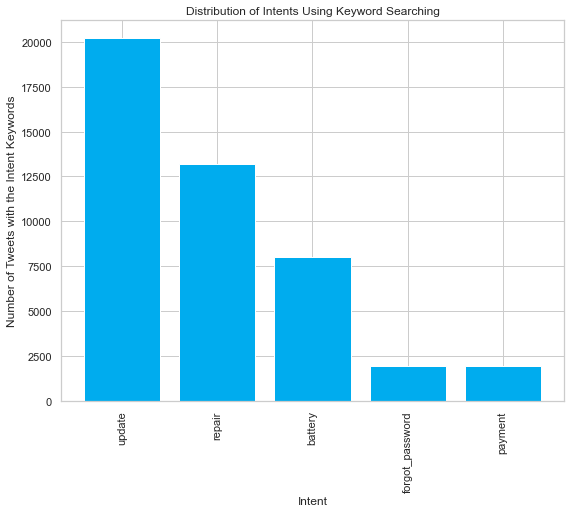

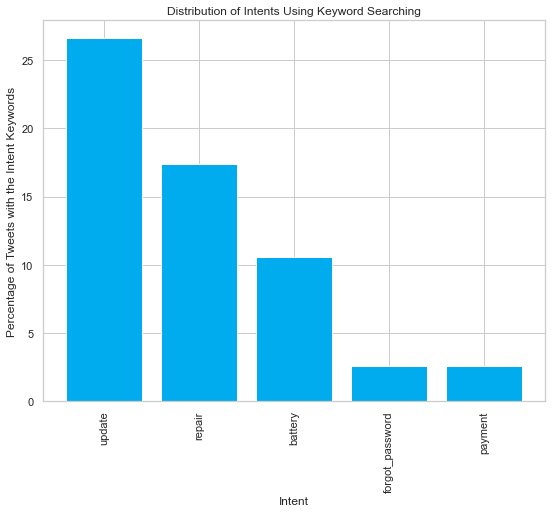

In [22]:
# Using the function above to visualize the distribution of intents in my dataset

intent_lengths = [
    len(get_key_tweets(processed["Processed Inbound"], intents[intent]))
    for intent in intents.keys()
]
keyword = pd.DataFrame(
    {"intents": list(intents.keys()), "intent_lengths": intent_lengths}
).sort_values("intent_lengths", ascending=False)

# Visualization
plt.figure(figsize=(9, 7))
plt.bar(keyword["intents"], keyword["intent_lengths"], color="#00acee")
plt.title("Distribution of Intents Using Keyword Searching")
plt.xlabel("Intent")
plt.xticks(rotation=90)
plt.ylabel("Number of Tweets with the Intent Keywords")
plt.show()

# Proportions visualization
plt.figure(figsize=(9, 7))
plt.bar(keyword["intents"], keyword["intent_lengths"] * 100 / 75879, color="#00acee")
plt.title("Distribution of Intents Using Keyword Searching")
plt.xlabel("Intent")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Tweets with the Intent Keywords")
# Saving
plt.savefig("visualizations/intent_distribution_keyword.png")
plt.show()

In [23]:
# Seeing precise numeric counts
keyword

intents  intent_lengths
0           update           20190
3           repair           13208
1          battery            7986
2  forgot_password            1934
4          payment            1915

‰ªéËøôÈáåÁúãÊù•ÔºåÊàë‰ª¨‰ºº‰πé‰∏ç‰ºöÊúâË∂≥Â§üÁöÑÊï∞ÊçÆÊù•‰∏∫ÊúÄÂêé‰∏§‰∏™ÊÑèÂõæÂêÑÂæóÂà∞1000‰∏™ÂÆû‰æãÔºå‰ΩÜËøôÊ≤°ÂÖ≥Á≥ªÔºåÂõ†‰∏∫ÊàëÊàñËÆ∏ÂèØ‰ª•Á®çÂêéÂ§çÂà∂ÂÆÉ‰ª¨„ÄÇ

ÊàëËøòÂÅö‰∫Ü‰∏Ä‰∏™Êõø‰ª£ÁöÑËøáÊª§Âô®ÔºåÁî®‰∫éËÆ°ÁÆóËá≥Â∞ëÂåÖÂê´‰∏Ä‰∏™ÈóÆÂè∑ÁöÑÊé®ÊñáÊï∞Èáè„ÄÇÂú®ËøôÊ¨°Êé¢Á¥¢‰∏≠ÔºåÊàëÂèëÁé∞Âú®ÊÄªÊï∞75879Êù°Êé®Êñá‰∏≠ÔºåÊúâ27373Êù°Ëá≥Â∞ëÂåÖÂê´1‰∏™ÈóÆÂè∑ÔºàÂç†36.1%Ôºâ„ÄÇ

### ÁªÑÂêàÊé¢Á¥¢
Âú®ËøôÈáåÔºåÊàëÊÉ≥ÁúãÁúã‰∏çÂêåÁ±ªÂà´‰πãÈó¥ÊúâÂ§öÂ∞ëÊé®ÊñáÈáçÂè†„ÄÇÂ¶ÇÊûúÊÑèÂõæ‰πãÈó¥ÁöÑÈáçÂè†Â§™Â§öÔºåËøôÊÑèÂë≥ÁùÄÊàë‰ª¨ÂèØ‰ª•‰∏∫ÈÇ£Êù°ÁâπÂÆöÁöÑÊé®ÊñáÊ†áËÆ∞‰∏§‰∏™ÊÑèÂõæ„ÄÇÊàëËÆ§‰∏∫Ëøô‰ªçÁÑ∂ÊòØÂèØË°åÁöÑÔºåÂ∞ΩÁÆ°ËøôÊÑèÂë≥ÁùÄÊàë‰ª¨ÈúÄË¶ÅÁúãÁúãÂ¶Ç‰ΩïÂõûÂ§çÂèåÈáçÊÑèÂõæ„ÄÇ

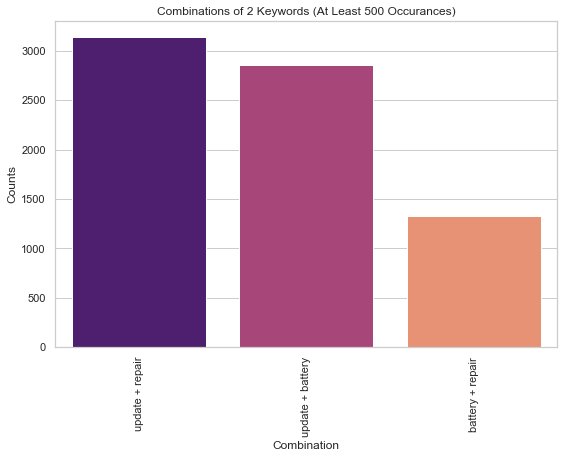

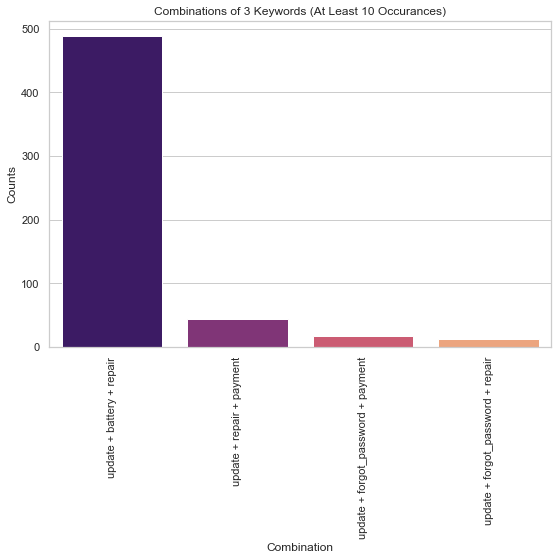

Not enough 4-combinations (Thres = 5)
Not enough 5-combinations (Thres = 5)


<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

In [9]:
# ÂàùÂßãÂåñÊâÄÊúâÁªÑÂêàÂá∫Áé∞Ê¨°Êï∞ÁöÑÊúÄÂ∞èÈòàÂÄº
thres = [500, 10, 5, 5]

# ÊÑèÂõæÊé®ÊñáÂåÖÂê´ÊâÄÊúâÂÖ≥ÈîÆËØçÔºåÂπ∂‰∏î‰Ωú‰∏∫ÈõÜÂêàÁöÑÂÄºÂåÖÂê´ÊâÄÊúâÂåÖÂê´ËØ•ÂÖ≥ÈîÆËØçÁöÑÊé®Êñá
intent_tweets = {}
for key in intents.keys():
    intent_tweets[key] = to_set(
        get_key_tweets(processed["Processed Inbound"], intents[key])
    )

# ÈÅçÂéÜÊâÄÊúâÈÖçÂØπÔºåÂπ∂Ëé∑ÂèñÈÖçÂØπ‰πãÈó¥ÁöÑÊé®Êñá‰∫§ÈõÜÊï∞Èáè
keyword_overlaps = {}

# ‰∏§‰∏™ÊÑèÂõæÁöÑÁªÑÂêà

# ÊØè‰∏™iËøîÂõû‰∏Ä‰∏™ÂåÖÂê´rÈïøÂ∫¶ÂØπÁöÑÂÖÉÁªÑÔºåÂú®Ëøô‰∏™‰æãÂ≠ê‰∏≠r‰∏∫2
for i in list(itertools.combinations(list(intents.keys()), 2)):
    a = to_set(intent_tweets[i[0]])
    b = to_set(intent_tweets[i[1]])
    # Inserting pair to dictionary
    keyword_overlaps[f"{i[0]} + {i[1]}"] = len(a.intersection(b))

# Á≠õÈÄâÂá∫ÈáçË¶ÅÁöÑÁªÑÂêàÔºåÊàëÂÆö‰πâÁöÑÈáçË¶ÅÁöÑÊ†áÂáÜÊòØÂá∫Áé∞Ê¨°Êï∞Â§ß‰∫é100
combs = []
counts = []
for i in keyword_overlaps.items():
    if i[1] > thres[0]:
        combs.append(i[0])
        counts.append(i[1])

# Visualizing as well
v = pd.DataFrame({"Combination": combs, "Counts": counts}).sort_values(
    "Counts", ascending=False
)
plt.figure(figsize=(9, 6))
sns.barplot(x=v["Combination"], y=v["Counts"], palette="magma")
plt.title(f"Combinations of 2 Keywords (At Least {thres[0]} Occurances)")
plt.xticks(rotation=90)
plt.show()

# ‰∏â‰∏™ÊÑèÂõæÁöÑÁªÑÂêà
keyword_overlaps = {}

try:
    # Each i returns a tuple containing a pair of length r, which in this case is 3
    for i in list(itertools.combinations(list(intents.keys()), 3)):
        a = to_set(intent_tweets[i[0]])
        b = to_set(intent_tweets[i[1]])
        c = to_set(intent_tweets[i[2]])
        # Inserting pair to dictionary
        keyword_overlaps[f"{i[0]} + {i[1]} + {i[2]}"] = len(
            a.intersection(b).intersection(c)
        )

    # Filtering to just the significant ones, which I define as greater than 100
    combs = []
    counts = []
    for i in keyword_overlaps.items():
        if i[1] > thres[1]:
            combs.append(i[0])
            counts.append(i[1])

    # Visualizing as well
    v = pd.DataFrame({"Combination": combs, "Counts": counts}).sort_values(
        "Counts", ascending=False
    )
    plt.figure(figsize=(9, 6))
    sns.barplot(x=v["Combination"], y=v["Counts"], palette="magma")
    plt.title(f"Combinations of 3 Keywords (At Least {thres[1]} Occurances)")
    plt.xticks(rotation=90)
    plt.show()
except ValueError as e:
    print(f"Not enough 3-combinations (Thres = {thres[1]})")

# Âõõ‰∏™ÊÑèÂõæÁöÑÁªÑÂêà
keyword_overlaps = {}

try:
    # Each i returns a tuple containing a pair of length r, which in this case is 4
    for i in list(itertools.combinations(list(intents.keys()), 4)):
        a = to_set(intent_tweets[i[0]])
        b = to_set(intent_tweets[i[1]])
        c = to_set(intent_tweets[i[2]])
        d = to_set(intent_tweets[i[3]])
        # Inserting pair to dictionary
        keyword_overlaps[f"{i[0]} + {i[1]} + {i[2]} + {i[3]}"] = len(
            a.intersection(b).intersection(c).intersection(d)
        )

    # Filtering to just the significant ones, which I define as greater than 10
    combs = []
    counts = []
    for i in keyword_overlaps.items():
        if i[1] > thres[2]:
            combs.append(i[0])
            counts.append(i[1])

    # Visualizing as well
    v = pd.DataFrame({"Combination": combs, "Counts": counts}).sort_values(
        "Counts", ascending=False
    )
    plt.figure(figsize=(9, 6))
    sns.barplot(x=v["Combination"], y=v["Counts"], palette="magma")
    plt.title(f"Combinations of 4 Keywords (At Least {thres[2]} Occurances)")
    plt.xticks(rotation=90)
    plt.show()
except ValueError as e:
    print(f"Not enough 4-combinations (Thres = {thres[2]})")

# 5‰∏™ÊÑèÂõæÁöÑÁªÑÂêà
keyword_overlaps = {}

try:
    # Each i returns a tuple containing a pair of length r, which in this case is 5
    for i in list(itertools.combinations(list(intents.keys()), 5)):
        a = to_set(intent_tweets[i[0]])
        b = to_set(intent_tweets[i[1]])
        c = to_set(intent_tweets[i[2]])
        d = to_set(intent_tweets[i[3]])
        e = to_set(intent_tweets[i[4]])
        # Inserting pair to dictionary
        keyword_overlaps[f"{i[0]} + {i[1]} + {i[2]} + {i[3]} + {i[4]}"] = len(
            a.intersection(b).intersection(c).intersection(d).intersection(e)
        )

    # Filtering to just the significant ones, which I define as greater than 5
    combs = []
    counts = []
    for i in keyword_overlaps.items():
        if i[1] > thres[3]:
            combs.append(i[0])
            counts.append(i[1])

    # Visualizing as well
    v = pd.DataFrame({"Combination": combs, "Counts": counts}).sort_values(
        "Counts", ascending=False
    )
    plt.figure(figsize=(9, 6))
    sns.barplot(x=v["Combination"], y=v["Counts"], palette="magma")
    plt.title(f"Combinations of 5 Keywords (At Least {thres[3]} Occurances)")
    plt.xticks(rotation=90)
    plt.show()
except ValueError as e:
    print(f"Not enough 5-combinations (Thres = {thres[3]})")


ËøòÊúâ‰ªÄ‰πàÂú∞ÊñπÊØîËãπÊûúËá™Â∑±ÁöÑ[@applesupport](https://twitter.com/AppleSupport)Êé®ÁâπÈ°µÈù¢Êõ¥ËÉΩÁúãÂà∞ÂèØÁî®ÁöÑÊÑèÂõæÂë¢Ôºü

Êàë‰ª¨ÁúãÂà∞Êõ¥Êñ∞ÈÄöÂ∏∏Â≠òÂú®‰∫éËÆ∏Â§öÁªÑÂêà‰∏≠
Â§ßÂ§öÊï∞ÊÑèÂõæÈÄöÂ∏∏ÊòØÂè¶‰∏Ä‰∏™ÊÑèÂõæÁöÑÁªÑÂêàÔºÅ
Êàë‰ª¨ÂèØ‰ª•ÁúãÂà∞ÔºåÂü∫‰∫éÁõ∏‰ººÊé®ÊñáÊï∞ÈáèÁöÑÁªùÂØπÂÄºÔºåÊàë‰ª¨‰∏ç‰ºöÁúüÁöÑÂæàÈöæ‰∏∫ÊØè‰∏™ÊÑèÂõæÁ±ªÂà´ÊâæÂà∞1000‰∏™ËÆ≠ÁªÉÁ§∫‰æã - Â∞§ÂÖ∂ÊòØÊõ¥Êñ∞ÔºÅÂ∞ÜËæÉÈ´òÁöÑÂèëÁîüÁéáÂàÜËß£‰∏∫Êõ¥ÁªÜÂæÆ„ÄÅÊõ¥Áã¨ÁâπÁöÑÁ±ªÂà´‰πüËÆ∏ÊòØ‰∏Ä‰∏™Â•Ω‰∏ªÊÑè„ÄÇÊ≠§Â§ñÔºåÊàëÈÄöÂ∏∏ÊÉ≥‰ΩøÁî®Ë∂ÖËøá1000Êù°Êé®ÊñáÁöÑÊÑèÂõæÔºåÂ•ΩÊ∂àÊÅØÊòØÂ§ßÂ§öÊï∞ÊÑèÂõæÊØè‰∏™ÈÉΩÊúâË∂ÖËøá1000Êù°Êé®Êñá„ÄÇ

# Special Cases
ÊàëÊÉ≥ÊµãËØï‰∏Ä‰∏ãÔºåÂèØËÉΩ‰ºöÊúâÁî®„ÄÇ

In [14]:
# I wanted to group iOS update into one intent. 
# But since ios and update occured a lot other I put them together into one intent group. 

print('app intents without ios: {}'.format(len(key_absent_tweets(get_key_tweets(processed_inbound, intents['app']), ['io']))))
key_absent_tweets(get_key_tweets(processed_inbound, intents['app']), ['io']);

# Exploration of combinations and "purity" of a cluster
print('both ios and update appears: {}'.format(6000))
print('just ios: {}'.format(len(get_key_tweets(processed_inbound, intents['app']))))
print('ios but no update: {}'.format(len(get_key_tweets(processed_inbound, intents['app'])) - 6000))

NameError: name 'processed_inbound' is not defined

### ÊàëÊÉ≥Êü•ÊâæÊàëÂú®ÂêØÂèëÂºèÊêúÁ¥¢‰∏≠Ê≤°ÊúâËÄÉËôëÁöÑÊâÄÊúâÊé®Êñá
ÂèØËÉΩÊúÄÊúâÁî®ÁöÑËøáÊª§Âô®ÊòØËøô‰∏™„ÄÇ

In [40]:
# Using the key absent function
key_absent_tweets(processed['Processed Inbound'].iloc, all_keywords)[:10]

[['hey',
  'anyone',
  'else',
  'upgraded',
  'io',
  'issue',
  'capital',
  'iÔ∏è',
  'mail',
  'app',
  'put'],
 ['hello',
  'internet',
  'someone',
  'explain',
  'symbol',
  'keep',
  'appear',
  'phone',
  'iÔ∏è',
  'try',
  'type',
  'letter',
  'iÔ∏è',
  'also'],
 ['get', 'screenshot', 'say', 'iphonex', 'reserve', 'email', 'say', 'happen'],
 ['hi', 'go', 'youtube', 'lose', 'do', 'thanks', 'support'],
 ['app', 'still', 'longer', 'able', 'control', 'lockscreen'],
 ['iÔ∏è', 'keep', 'change', 'iÔ∏è', 'stop', 'ü§¶üèΩ\u200d‚ôÄ', 'Ô∏è', 'anybody'],
 ['hello', 'need', 'help', 'regard', 'region', 'change', 'apple', 'id'],
 ['time', 'try', 'two', 'different', 'apple', 'id', 'still', 'show', 'phone'],
 ['get',
  'white',
  'screen',
  'nothing',
  'load',
  'short',
  'time',
  'close',
  'crash',
  'thanks',
  'reply'],
 ['change',
  'ringer',
  'volume',
  'button',
  'whose',
  'dumb',
  'idea',
  'change',
  'still',
  'job']]

‰ªéËøôÈáåÔºåÊàëÂæóÂà∞‰∫ÜËß£ÈáäÁöÑÁÅµÊÑüÔºö
* Settings
* Apple Music
* Phone
* Credit card

In [41]:
only_key_tweets(processed_inbound, intents_all['ios update'])

0       [iphone, yes, io, checked, update, none, avail...
1       [update, io, iphone, icloud, backup, greyed, c...
2       [sort, thanks, io, update, need, change, hard,...
3       [top, bar, every, time, open, message, se, upd...
4       [have, update, io, shall, check, wifi, hotspot...
                              ...                        
6053    [iphone, believe, run, version, io, phone, wou...
6054    [update, new, io, speaker, work, play, music, ...
6055    [every, time, bring, new, phone, release, io, ...
6056    [reason, iphone, plus, extremely, low, call, v...
6057    [anyone, iphone, issue, phone, freeze, randoml...
Length: 6058, dtype: object

In [42]:
only_key_tweets(processed_inbound, ['app'])

0       [hey, anyone, else, upgraded, io, issue, capit...
1         [app, still, longer, able, control, lockscreen]
2       [iphone, yes, io, checked, update, none, avail...
3         [phone, app, work, thank, update, iphone, ipod]
4       [bug, calendar, app, fix, upgraded, io, still,...
                              ...                        
4175    [itunes, open, although, app, store, warn, can...
4176    [another, iphone, update, still, fix, podcast,...
4177    [fix, io, fuckover, kill, phone, garage, door,...
4178    [hey, listen, one, podcast, order, continuousl...
4179    [dear, fuck, wish, iphone, would, stop, crash,...
Length: 4180, dtype: object

In [43]:
keyword

intents  intent_lengths
0           update           20190
3           repair           13208
1          battery            7986
2  forgot_password            1934
4          payment            1915

In [1]:
# Inspecting the Tweets with that specific keyword
len(get_key_tweets(processed_inbound, intents['greeting'])), 6895/75879

NameError: name 'get_key_tweets' is not defined

In [45]:
get_key_tweets(processed_inbound, intents['app'])

[['hey',
  'anyone',
  'else',
  'upgraded',
  'io',
  'issue',
  'capital',
  'iÔ∏è',
  'mail',
  'app',
  'put'],
 ['app', 'still', 'longer', 'able', 'control', 'lockscreen'],
 ['iphone',
  'yes',
  'io',
  'checked',
  'update',
  'none',
  'available',
  'swipe',
  'close',
  'app',
  'several',
  'time',
  'restart'],
 ['phone', 'app', 'work', 'thank', 'update', 'iphone', 'ipod'],
 ['bug', 'calendar', 'app', 'fix', 'upgraded', 'io', 'still', 'crash', 'io'],
 ['have',
  'also',
  'force',
  'app',
  'close',
  'background',
  'reopen',
  'dice',
  'üé≤'],
 ['wife',
  'make',
  'mistake',
  'update',
  'revert',
  'back',
  'password',
  'keeper',
  'app',
  'dead',
  'can',
  'not',
  'access',
  'password'],
 ['io',
  'never',
  'release',
  'many',
  'bug',
  'statusbar',
  'randomly',
  'disappears',
  'facebook',
  'app'],
 ['attempt',
  'open',
  'twitter',
  'app',
  'complain',
  'io',
  'mess',
  'iphone',
  'slow',
  'life'],
 ['happens', 'close', 'whatsapp', 'happen', 'a

In [46]:
intents['greeting']

['hi', 'hello', 'hey', 'yo']

In [47]:
processed_inbound.iloc[0:10]

0     [new, update, iÔ∏è, make, sure, download, yester...
6     [hey, anyone, else, upgraded, io, issue, capit...
12    [hello, internet, someone, explain, symbol, ke...
13    [get, screenshot, say, iphonex, reserve, email...
15    [thank, update, phone, even, slow, barely, wor...
19    [need, software, update, urgently, battery, la...
21         [hi, go, youtube, lose, do, thanks, support]
25    [hey, last, time, download, update, freak, pho...
27      [app, still, longer, able, control, lockscreen]
29           [need, something, battery, life, suck, as]
Name: inbound_text, dtype: object

## ÊçïËé∑ÁöÑÊÑèÂõæ
ÔºàËøôÂè™ÊòØÊàëËÆ§‰∏∫ÊÑèÂõæÁöÑÂè¶‰∏Ä‰∏™ÁâàÊú¨-‰Ω†ÂèØ‰ª•ÁúãÂà∞Ëøô‰∫õÊÑèÂõæÊúâÂ§ö‰∏™ÁâàÊú¨ÔºåÂõ†‰∏∫ËøôÊòØ‰∏Ä‰∏™Ëø≠‰ª£ÂêØÂèëÂºè‰ºòÂåñËøáÁ®ãÔºâ-ÂÆûÈôÖ‰∏äÊàëËä±‰∫Ü‰∏ÄÊÆµÊó∂Èó¥ÊâçÊâæÂà∞Â¶Ç‰ΩïÊåñÊéòÊÑèÂõæÁöÑÂ•ΩÊåáÂçó„ÄÇ

1. Greeting
2. App recommendations
    * Need to tag the actual appication we want
    * Need to tag the problem
3. Hardware recommendations
    * Phone hardware issue
    * Battery health
6. ICloud photos
7. Apple watch
8. Software (iOS)/ update bugs
9. Statement (not really asking for anything, it is just giving a statement about something) - If possible, I would like to remove these because they are not really that useful to me.
    * Opinions
    * Complaint
    * Thinking about this point further, it might be useful to include question marks in the data because that encodes useful information about whether or not a customer is making a question or not.
10. Want to purchase
11. Gratitude/Closing

---
1. ÈóÆÂÄô
2. Â∫îÁî®Êé®Ëçê
    * ÈúÄË¶ÅÊ†áËÆ∞Êàë‰ª¨ÊÉ≥Ë¶ÅÁöÑÂÆûÈôÖÂ∫îÁî®Á®ãÂ∫è
    * ÈúÄË¶ÅÊ†áËÆ∞ÈóÆÈ¢ò
3. Á°¨‰ª∂Êé®Ëçê
    * ÊâãÊú∫Á°¨‰ª∂ÈóÆÈ¢ò
    * ÁîµÊ±†ÂÅ•Â∫∑
6. iCloudÁÖßÁâá
7. ËãπÊûúÊâãË°®
8. ËΩØ‰ª∂ÔºàiOSÔºâ/Êõ¥Êñ∞ÈîôËØØ
9. ÈôàËø∞ÔºàÂπ∂ÈùûÁúüÊ≠£ËØ¢ÈóÆ‰ªª‰Ωï‰∫ãÊÉÖÔºåÂè™ÊòØÂØπÊüê‰∫ãÂèëË°®ÈôàËø∞Ôºâ- Â¶ÇÊûúÂèØËÉΩÁöÑËØùÔºåÊàëÊÉ≥Â∞ÜËøô‰∫õÁßªÈô§ÔºåÂõ†‰∏∫ÂÆÉ‰ª¨ÂØπÊàëÊù•ËØ¥Âπ∂‰∏çÁúüÊ≠£ÊúâÁî®„ÄÇ
    * ËßÇÁÇπ
    * Êä±ÊÄ®
    * Ëøõ‰∏ÄÊ≠•ÊÄùËÄÉËøô‰∏ÄÁÇπÔºåÂèØËÉΩÊúâÁî®ÁöÑÊòØÂú®Êï∞ÊçÆ‰∏≠ÂåÖÂê´ÈóÆÂè∑ÔºåÂõ†‰∏∫ËøôÁºñÁ†Å‰∫ÜÂÖ≥‰∫éÂÆ¢Êà∑ÊòØÂê¶Âú®ÊèêÈóÆÁöÑÊúâÁî®‰ø°ÊÅØ„ÄÇ
10. ÊÉ≥Ë¶ÅË¥≠‰π∞
11. ÊÑüÊøÄ/ÁªìÊùü